In [3]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.ensemble import RandomForestRegressor

In [27]:
%matplotlib inline
import japanize_matplotlib
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

# Try reading the CSV file with on_bad_lines set to 'skip' to skip problematic lines
df = pd.read_csv('../raw_data/tokyo_20221_20234.csv', encoding="cp932", on_bad_lines='skip')

# Optionally, specify the correct delimiter if it's not a comma
# df = pd.read_csv('../raw_data/tokyo_20201_20234.csv', encoding="cp932", sep=';', on_bad_lines='skip')

In [9]:
df.head(2)

,種類,価格情報区分,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,...,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時期,改装,取引の事情等
0,中古マンション等,成約価格情報,13101,東京都,千代田区,岩本町,小伝馬町,2,120000000,３ＬＤＫ,...,2013年,ＲＣ,NaN,NaN,商業,NaN,NaN,2022年第1四半期,NaN,NaN
1,中古マンション等,成約価格情報,13101,東京都,千代田区,岩本町,岩本町,5,29000000,１Ｋ,...,2013年,ＲＣ,NaN,NaN,商業,NaN,NaN,2022年第1四半期,NaN,NaN


In [10]:
df= df[df['種類'] == '中古マンション等']

In [11]:
df['取引価格（総額）'] = df['取引価格（総額）']/10000

In [12]:
df['年号'] = df['建築年'].str[:2]

In [13]:
df['年号'].head()

0    20
1    20
2    20
3    20
4    19
Name: 年号, dtype: object

In [14]:
df.drop(columns=['年号'],inplace=True)

In [16]:
# Get the current year
current_year = pd.Timestamp.now().year

In [21]:
# Step 1: Remove '年' character
df['建築年'] = df['建築年'].str.replace('年', '')

# Step 2: Drop rows with the value '戦前'
df = df[df['建築年'] != '戦前']

# Step 3: Convert to numeric, coercing errors to NaN
df['建築年'] = pd.to_numeric(df['建築年'], errors='coerce')

# Step 4: Fill NaN values with a placeholder or drop them
df['建築年'].fillna(0, inplace=True)  # Example: Fill with 0, or you can choose to drop these rows

# Get the current year
current_year = pd.Timestamp.now().year

# Step 5: Calculate the age of the building and add as new column '築年数'
df['築年数'] = current_year - df['建築年'].astype(int)

df.head()

AttributeError: Can only use .str accessor with string values!

In [22]:
df.head()

,種類,価格情報区分,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,...,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時期,改装,取引の事情等,築年数
0,中古マンション等,成約価格情報,13101,東京都,千代田区,岩本町,小伝馬町,2,12000.0,３ＬＤＫ,...,ＲＣ,NaN,NaN,商業,NaN,NaN,2022年第1四半期,NaN,NaN,11
1,中古マンション等,成約価格情報,13101,東京都,千代田区,岩本町,岩本町,5,2900.0,１Ｋ,...,ＲＣ,NaN,NaN,商業,NaN,NaN,2022年第1四半期,NaN,NaN,11
2,中古マンション等,成約価格情報,13101,東京都,千代田区,岩本町,岩本町,4,4400.0,１ＬＤＫ＋Ｓ,...,ＲＣ,NaN,NaN,商業,NaN,NaN,2022年第1四半期,NaN,NaN,9
3,中古マンション等,成約価格情報,13101,東京都,千代田区,岩本町,岩本町,4,6000.0,１ＬＤＫ,...,ＲＣ,NaN,NaN,商業,NaN,NaN,2022年第1四半期,NaN,NaN,6
4,中古マンション等,成約価格情報,13101,東京都,千代田区,岩本町,秋葉原,7,2000.0,１Ｒ,...,ＲＣ,NaN,NaN,商業,NaN,NaN,2022年第1四半期,NaN,NaN,39


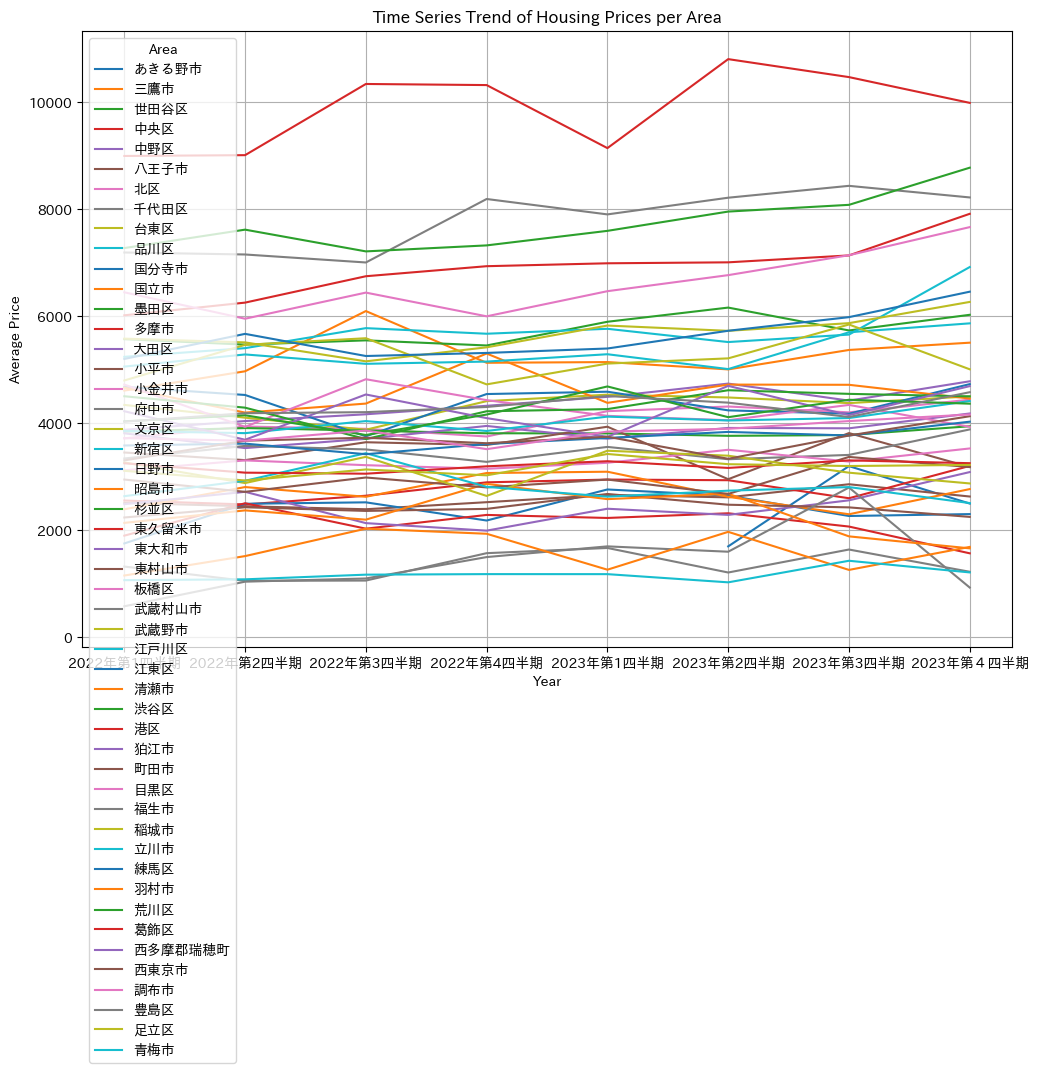

In [28]:
# Step 6: Plotting the time series trend graph per area
# Assuming 'エリア' is the column name for area and '価格' is the column name for price
df['年'] = pd.to_datetime(df['建築年'], format='%Y', errors='coerce').dt.year

# Group by area and year, then calculate the mean price
area_yearly_trend = df.groupby(['市区町村名', '取引時期'])['取引価格（総額）'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 8))
for area in area_yearly_trend.index:
    plt.plot(area_yearly_trend.columns, area_yearly_trend.loc[area], label=area)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Time Series Trend of Housing Prices per Area')
plt.legend(title='Area')
plt.grid(True)
plt.show()

In [31]:
list_of_area = df['市区町村名'].unique()
print(list_of_area)

['千代田区' '中央区' '港区' '新宿区' '文京区' '台東区' '墨田区' '江東区' '品川区' '目黒区' '大田区' '世田谷区'
 '渋谷区' '中野区' '杉並区' '豊島区' '北区' '荒川区' '板橋区' '練馬区' '足立区' '葛飾区' '江戸川区' '八王子市'
 '立川市' '武蔵野市' '三鷹市' '青梅市' '府中市' '昭島市' '調布市' '町田市' '小金井市' '小平市' '日野市'
 '東村山市' '国分寺市' '国立市' '福生市' '狛江市' '東大和市' '清瀬市' '東久留米市' '武蔵村山市' '多摩市' '稲城市'
 '羽村市' 'あきる野市' '西東京市' '西多摩郡瑞穂町']
